In [10]:
import pybamm
import matplotlib.pyplot as plt

In [19]:
def electrolyte_diffusivity_Nyman2008(c_e, T):
    D_c_e = 8.794e-11 * (c_e / 1000) ** 2 - 3.972e-10 * (c_e / 1000) + 4.862e-10
    return D_c_e


def electrolyte_conductivity_Nyman2008(c_e, T):
    sigma_e = (
        0.1297 * (c_e / 1000) ** 3 - 2.51 * (c_e / 1000) ** 1.5 + 3.329 * (c_e / 1000)
    )
    return sigma_e


def x_n(U):
    T = 298.15
    f = pybamm.constants.F / (pybamm.constants.R * T)
    xj = 0
    for i in range(6):
        U0 = pybamm.Parameter(f"U0_n_{i}")
        w = pybamm.Parameter(f"w_n_{i}")
        Xj = pybamm.Parameter(f"Xj_n_{i}")

        xj += Xj / (1 + pybamm.exp(f * (U - U0) / w))

    return xj


def dxdU_n(U):
    T = 298.15
    f = pybamm.constants.F / (pybamm.constants.R * T)
    dxj = 0
    for i in range(6):
        U0 = pybamm.Parameter(f"U0_n_{i}")
        w = pybamm.Parameter(f"w_n_{i}")
        Xj = pybamm.Parameter(f"Xj_n_{i}")

        e = pybamm.exp(f * (U - U0) / w)
        dxj += -(f / w) * (Xj * e) / (1 + e) ** 2

    return dxj


def x_p(U):
    T = 298.15
    f = pybamm.constants.F / (pybamm.constants.R * T)
    xj = 0
    for i in range(4):
        U0 = pybamm.Parameter(f"U0_p_{i}")
        w = pybamm.Parameter(f"w_p_{i}")
        Xj = pybamm.Parameter(f"Xj_p_{i}")

        xj += Xj / (1 + pybamm.exp(f * (U - U0) / w))

    return xj


def dxdU_p(U):
    T = 298.15
    f = pybamm.constants.F / (pybamm.constants.R * T)
    dxj = 0
    for i in range(4):
        U0 = pybamm.Parameter(f"U0_p_{i}")
        w = pybamm.Parameter(f"w_p_{i}")
        Xj = pybamm.Parameter(f"Xj_p_{i}")

        e = pybamm.exp(f * (U - U0) / w)
        dxj += -(f / w) * (Xj * e) / (1 + e) ** 2

    return dxj


def get_parameter_values():
    return {
        # cell
        "Negative electrode thickness [m]": 7.56e-05,
        "Separator thickness [m]": 1.2e-05,
        "Positive electrode thickness [m]": 7.56e-05,
        "Electrode height [m]": 0.065,
        "Electrode width [m]": 1.58,
        "Nominal cell capacity [A.h]": 5.0,
        "Current function [A]": 5.0,
        "Contact resistance [Ohm]": 0,
        # negative electrode
        "Negative electrode stoichiometry": x_n,
        "Negative electrode stoichiometry change [V-1]": dxdU_n,
        "U0_n_0": 0.08843,
        "Xj_n_0": 0.43336,
        "w_n_0": 0.08611,
        "U0_n_1": 0.12799,
        "Xj_n_1": 0.23963,
        "w_n_1": 0.08009,
        "U0_n_2": 0.14331,
        "Xj_n_2": 0.15018,
        "w_n_2": 0.72469,
        "U0_n_3": 0.16984,
        "Xj_n_3": 0.05462,
        "w_n_3": 2.53277,
        "U0_n_4": 0.21446,
        "Xj_n_4": 0.06744,
        "w_n_4": 0.09470,
        "U0_n_5": 0.36325,
        "Xj_n_5": 0.05476,
        "w_n_5": 5.97354,
        "Negative electrode stoichiometry at 0% SOC": 0.03,
        "Negative electrode stoichiometry at 100% SOC": 0.9,
        "Negative electrode conductivity [S.m-1]": 215.0,
        "Maximum concentration in negative electrode [mol.m-3]": 33133.0,
        "Negative electrode diffusivity [m2.s-1]": 3.3e-14,
        "Negative electrode porosity": 0.25,
        "Negative electrode active material volume fraction": 0.75,
        "Negative particle radius [m]": 5.86e-06,
        "Negative electrode Bruggeman coefficient (electrolyte)": 1.5,
        "Negative electrode Bruggeman coefficient (electrode)": 0,
        "Negative electrode exchange-current density [A.m-2]" "": 2.7,
        "Negative electrode OCP entropic change [V.K-1]": 0.0,
        # positive electrode
        "Positive electrode stoichiometry": x_p,
        "Positive electrode stoichiometry change [V-1]": dxdU_p,
        "U0_p_0": 3.62274,
        "Xj_p_0": 0.13442,
        "w_p_0": 0.96710,
        "U0_p_1": 3.72645,
        "Xj_p_1": 0.32460,
        "w_p_1": 1.39712,
        "U0_p_2": 3.90575,
        "Xj_p_2": 0.21118,
        "w_p_2": 3.50500,
        "U0_p_3": 4.22955,
        "Xj_p_3": 0.32980,
        "w_p_3": 5.52757,
        "Positive electrode stoichiometry at 0% SOC": 0.85,
        "Positive electrode stoichiometry at 100% SOC": 0.1,
        "Positive electrode conductivity [S.m-1]": 0.18,
        "Maximum concentration in positive electrode [mol.m-3]": 63104.0,
        "Positive electrode diffusivity [m2.s-1]": 4e-15,
        "Positive electrode porosity": 0.335,
        "Positive electrode active material volume fraction": 0.665,
        "Positive particle radius [m]": 5.22e-06,
        "Positive electrode Bruggeman coefficient (electrolyte)": 1.5,
        "Positive electrode Bruggeman coefficient (electrode)": 0,
        "Positive electrode exchange-current density [A.m-2]" "": 5,
        "Positive electrode OCP entropic change [V.K-1]": 0.0,
        # separator
        "Separator porosity": 0.47,
        "Separator Bruggeman coefficient (electrolyte)": 1.5,
        # electrolyte
        "Initial concentration in electrolyte [mol.m-3]": 1000.0,
        "Cation transference number": 0.2594,
        "Thermodynamic factor": 1.0,
        "Electrolyte diffusivity [m2.s-1]": electrolyte_diffusivity_Nyman2008,
        "Electrolyte conductivity [S.m-1]": electrolyte_conductivity_Nyman2008,
        # experiment
        "Reference temperature [K]": 298.15,
        "Total heat transfer coefficient [W.m-2.K-1]": 10.0,
        "Ambient temperature [K]": 298.15,
        "Number of electrodes connected in parallel to make a cell": 1.0,
        "Number of cells connected in series to make a battery": 1.0,
        "Lower voltage cut-off [V]": 2.5,
        "Upper voltage cut-off [V]": 4.5,
        "Initial temperature [K]": 298.15,
    }




In [20]:

class BasicSPMSMR(pybamm.lithium_ion.BaseModel):
    def __init__(self, name="Single Particle MSMR Model"):
        super().__init__({}, name)
        param = self.param

        ######################
        # Variables
        ######################
        Q = pybamm.Variable("Discharge capacity [A.h]")
        U_n = pybamm.Variable("X-averaged negative electrode OCP [V]")
        U_p = pybamm.Variable("X-averaged positive electrode OCP [V]")

        # Current density
        i_cell = param.current_density_with_time
        a_n = 3 * param.n.prim.epsilon_s_av / param.n.prim.R_typ
        a_p = 3 * param.p.prim.epsilon_s_av / param.p.prim.R_typ
        j_n = i_cell / (param.n.L * a_n)
        j_p = -i_cell / (param.p.L * a_p)

        ######################
        # State of Charge
        ######################
        I = param.current_with_time
        # The `rhs` dictionary contains differential equations, with the key being the
        # variable in the d/dt
        self.rhs[Q] = I / 3600
        # Initial conditions must be provided for the ODEs
        self.initial_conditions[Q] = pybamm.Scalar(0)

        ######################
        # Particles
        ######################

        def dxdU_n(U_n):
            inputs = {"Negative electrode OCP [V]": U_n}
            return pybamm.FunctionParameter(
                "Negative electrode stoichiometry change [V-1]", inputs=inputs
            )

        def dxdU_p(U_p):
            inputs = {"Positive electrode OCP [V]": U_p}
            return pybamm.FunctionParameter(
                "Positive electrode stoichiometry change [V-1]", inputs=inputs
            )

        # Fast diffusion limit
        F = param.F
        R_n = pybamm.x_average(param.n.prim.R)
        R_p = pybamm.x_average(param.p.prim.R)
        c_n_max = param.n.prim.c_max
        c_p_max = param.p.prim.c_max
        self.rhs[U_n] = (-3 * j_n / F / R_n / c_n_max) / dxdU_n(U_n)
        self.rhs[U_p] = (-3 * j_p / F / R_p / c_p_max) / dxdU_p(U_p)
        self.initial_conditions[U_n] = pybamm.Parameter(
            "Initial negative electrode potential [V]"
        )
        self.initial_conditions[U_p] = pybamm.Parameter(
            "Initial positive electrode potential [V]"
        )

        ######################
        # (Some) variables
        ######################
        phi_s_n = 0
        phi_s_p = U_p - U_n
        V = phi_s_p

        self.variables = {
            "Discharge capacity [A.h]": Q,
            "Current [A]": I,
            "Negative electrode potential [V]": pybamm.PrimaryBroadcast(
                phi_s_n, "negative electrode"
            ),
            "Positive electrode potential [V]": pybamm.PrimaryBroadcast(
                phi_s_p, "positive electrode"
            ),
            "Voltage [V]": V,
        }
        self.events += [
            pybamm.Event("Minimum voltage [V]", V - param.voltage_low_cut),
            pybamm.Event("Maximum voltage [V]", param.voltage_high_cut - V),
        ]

    @property
    def default_parameter_values(self):
        return pybamm.ParameterValues(get_parameter_values())

    @property
    def default_quick_plot_variables(self):
        return [
            "Current [A]",
            "Negative electrode potential [V]",
            "Positive electrode potential [V]",
            "Voltage [V]",
        ]

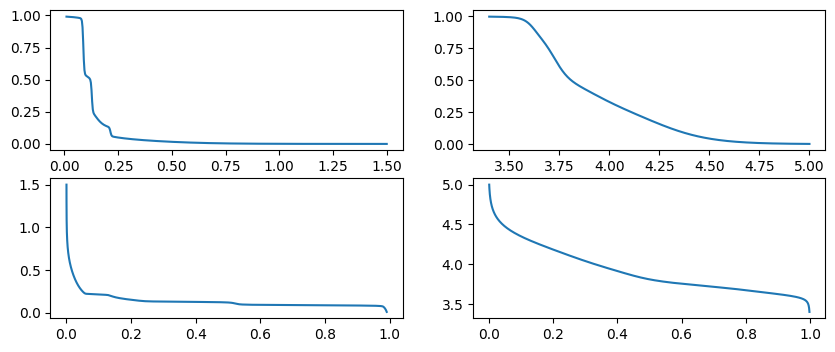

In [21]:
model = BasicSPMSMR()
parameter_values = model.default_parameter_values

fig, ax = plt.subplots(2, 2, figsize=(10, 4))

U = pybamm.linspace(0.01, 1.5, 500)
x_eval = parameter_values.evaluate(x_n(U)).flatten()
U_eval = U.evaluate().flatten()
ax[0, 0].plot(U_eval, x_eval, label="x_n")
ax[1, 0].plot(x_eval, U_eval, label="x_n")

U = pybamm.linspace(3.4, 5, 500)
x_eval = parameter_values.evaluate(x_p(U)).flatten()
U_eval = U.evaluate().flatten()
ax[0, 1].plot(U_eval, x_eval, label="x_p")
ax[1, 1].plot(x_eval, U_eval, label="x_p")

In [22]:
soc_model = pybamm.BaseModel()
U_n = pybamm.Variable("U_n")
U_p = pybamm.Variable("U_p")
soc_model.variables = {"U_n": U_n, "U_p": U_p}
x_0 = parameter_values["Negative electrode stoichiometry at 0% SOC"]
x_100 = parameter_values["Negative electrode stoichiometry at 100% SOC"]
y_0 = parameter_values["Positive electrode stoichiometry at 0% SOC"]
y_100 = parameter_values["Positive electrode stoichiometry at 100% SOC"]
initial_soc = pybamm.InputParameter("Initial soc")
x = x_0 + initial_soc * (x_100 - x_0)
y = y_0 - initial_soc * (y_0 - y_100)
soc_model.algebraic = {U_n: x - x_n(U_n), U_p: y - x_p(U_p)}
soc_model.initial_conditions = {U_n: pybamm.Scalar(0), U_p: pybamm.Scalar(4)}
parameter_values.process_model(soc_model)
soc_sol = pybamm.AlgebraicSolver(tol=1e-6).solve(soc_model, inputs={"Initial soc": 1})
U_n, U_p = soc_sol["U_n"].data[0], soc_sol["U_p"].data[0]

parameter_values.update(
    {
        "Initial negative electrode potential [V]": U_n,
        "Initial positive electrode potential [V]": U_p,
    },
    check_already_exists=False,
)
print(U_n, U_p)

0.08494793698397733 4.350779153249299


In [24]:
sim = pybamm.Simulation(model, parameter_values=parameter_values)
sim.solve([0, 3300])
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3300.0, step=33.0), Output()), _dom_classes=…